In [9]:
from IPython.display import Image
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Operator

# Circuits
In Computer science a *circuit* is a model of computation in which data is carried through wires and gates where gates represent operations on the data. 

### Boolean Circuits

In [4]:
Image(filename='Images/Boolean-circuit-XOR.png') 

The above is an example of a boolean circuit where the gates represent boolean logic operators (not, And, or). The two small circles represent *fanout* operations which create a copy of the information so that it can follow multiple paths. In classical circuits they are generally considered free but for quantum circuits they will need to be treated as gates to account for them correctly. 

The same circuit can be represented symbolically as is more common in electrical engineering.

In [5]:
Image(filename='Images/Boolean-circuit-classic.png') 

We won't use the ee style much in these lectures. The circuit we've been looking at computes the *exclusive-or* or XOR. Denoted $\oplus$. 

 $ab$ | $a \oplus b$ 
 --- | ---|
$00$ | $0$ 
$01$ | $1$  
$10$ | $1$ 
$11$ | $0$ 


### Quantum Circuits
Now lets look at quantum circuits with *unitary* operators. Take the below as an example. 

In [6]:
Image(filename='Images/simple-quantum-circuit.png') 

This circuit takes a qubit $X$ then preforms 4 *unitary* operations. It does a Hadamard, an S, another Hadamard, and a T operations. Sometimes we want to explicitely indicate the state the operations are run on. 

![title](Images/simple-quantum-circuit-evaluated.png)


In [16]:
# from vectors and operators
ket0 = Statevector([1, 0])
H = Operator.from_label("H")
S = Operator.from_label("S")
T = Operator.from_label("T")

display(ket0.draw("latex"))
display(H.draw("latex"))
display(ket0.evolve(H).evolve(S).evolve(H).evolve(T).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

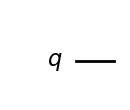

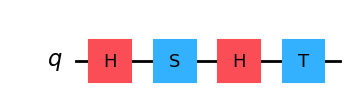

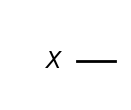

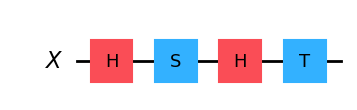

In [21]:
# defined as a circuit
c = QuantumCircuit(1) # takes the number of inputs
display(c.draw("mpl"))
c.h(0)
c.s(0)
c.h(0)
c.t(0)
display(c.draw("mpl"))
# The default name of the qubits are q_n we can change this by doing 
X = QuantumRegister(1, "X")
c2 = QuantumCircuit(X) # takes the number of inputs
display(c2.draw("mpl"))
c2.h(0)
c2.s(0)
c2.h(0)
c2.t(0)
display(c2.draw("mpl"))

Now lets look at a quantum circuit with 2 qubits. 
![title](Images/ebit-circuit.png)

Once again the $H$ refers to the hadamard operation while $\oplus$ is a 2-qubit gate that is a *controlled-not* operation where the $\oplus$ denotes the target bit and the solid circle is the control bit. 

### Qiskit's qubit ordering convention for circuits
In Qiskit the topmost qubit in a ciruit diagram has index 0 and correspond to the *rightmost* position in a tuple of qubits. The second has index 1 and is the qubit second from the right in the tuple and so on. Then the bottommost qubit has the highest index and represents the leftmost qubit. So they are represented ($q_{n-1}\dots q_0$).

Back to the above circuit. Lets assume $X$ starts in $\ket{\psi}$ and $Y$ starts in $\ket{\phi}$. We then go left to right on the operations. So first Hadamard is applied to $Y$ then controlled not is applied on $XY$. We can combine these operations by combining the two qbits into 1 system. 

So we would take $I\otimes H$ for the first operation then compose with the controlled not operation $N$
$$
U \\
= N I \otimes H   \\
= 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
\end{pmatrix}
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}  & 0 & 0 \\
\frac{1}{\sqrt{2}}  & -\frac{1}{\sqrt{2}}  & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}}  \\
0 & 0 & \frac{1}{\sqrt{2}}  & -\frac{1}{\sqrt{2}}  \\
\end{pmatrix} \\
=
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}  & 0 & 0 \\
0  & 0  & \frac{1}{\sqrt{2}}  & -\frac{1}{\sqrt{2}}  \\
0 & 0 & \frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}}  \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\
\end{pmatrix}
$$
We notice that this can be written as Bell states. 
$$
U\ket{00} = \ket{\phi^+} \\
U\ket{01} = \ket{\phi^-} \\
U\ket{10} = \ket{\psi^+} \\
U\ket{11} = -\ket{\psi^-} \\
$$
This means we can generate bell states given two qubits that start in $\ket{00}$.

In [31]:
X = Statevector([1, 0])
Y = Statevector([0, 1])
controll_not = Operator([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])
H = Operator.from_label("H")
I = Operator.from_label("I")

# one at a time
Y_h = Y.evolve(H)
display(Y_h.tensor(X).evolve(controll_not).draw("latex"))

## alternatively we can 

<IPython.core.display.Latex object>